In [4]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
data=pd.read_csv('car_details.csv')

In [6]:

data.head()

,details_id,year_of_manuf,fuel_type,no_of_seats,transmission_type
0,1,2015,CNG,5,Manual
1,2,2014,Electric,6,Auto
2,3,2013,Electric,8,Manual
3,4,2018,Diesel,6,Manual
4,5,2015,Electric,8,Auto


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   details_id         2000 non-null   int64 
 1   year_of_manuf      2000 non-null   int64 
 2   fuel_type          2000 non-null   object
 3   no_of_seats        2000 non-null   int64 
 4   transmission_type  2000 non-null   object
dtypes: int64(3), object(2)
memory usage: 78.2+ KB


In [8]:
for i in data.columns:
    print(data[i].unique(),"\t",data[i].nunique())

[   1    2    3 ... 1998 1999 2000] 	 2000
[2015 2014 2013 2018 2017 2019 2016 2020 2012] 	 9
['CNG' 'Electric' 'Diesel' 'Petrol'] 	 4
[5 6 8 7 4] 	 5
['Manual' 'Auto'] 	 2


In [9]:
for i in data.columns:
    print(data[i].value_counts())
    for i in data.columns:
        print(data[i].value_counts())
        print()

1999    1
1342    1
1316    1
1318    1
1320    1
       ..
677     1
679     1
681     1
683     1
2       1
Name: details_id, Length: 2000, dtype: int64
1999    1
1342    1
1316    1
1318    1
1320    1
       ..
677     1
679     1
681     1
683     1
2       1
Name: details_id, Length: 2000, dtype: int64

2016    267
2015    259
2014    258
2017    254
2013    250
2019    236
2018    236
2012    121
2020    119
Name: year_of_manuf, dtype: int64

CNG         683
Diesel      668
Petrol      335
Electric    314
Name: fuel_type, dtype: int64

7    520
5    510
6    497
8    237
4    236
Name: no_of_seats, dtype: int64

Manual    1009
Auto       991
Name: transmission_type, dtype: int64

2016    267
2015    259
2014    258
2017    254
2013    250
2019    236
2018    236
2012    121
2020    119
Name: year_of_manuf, dtype: int64
1999    1
1342    1
1316    1
1318    1
1320    1
       ..
677     1
679     1
681     1
683     1
2       1
Name: details_id, Length: 2000, dtype: int64

2016  

C:\Users\Mohit Peshwani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transmission_type', ylabel='count'>

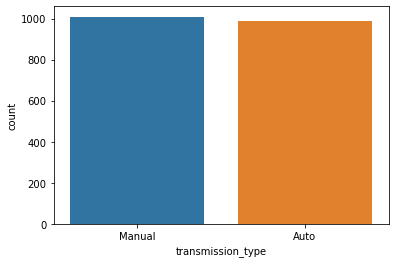

In [10]:
sns.countplot(data['transmission_type'])

C:\Users\Mohit Peshwani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohit Peshwani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Mohit Peshwani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\U

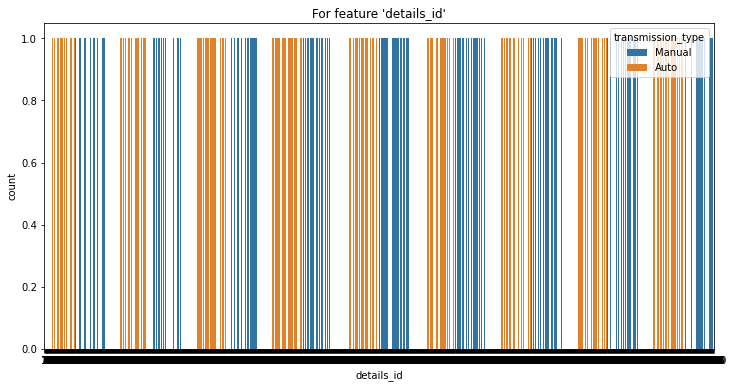

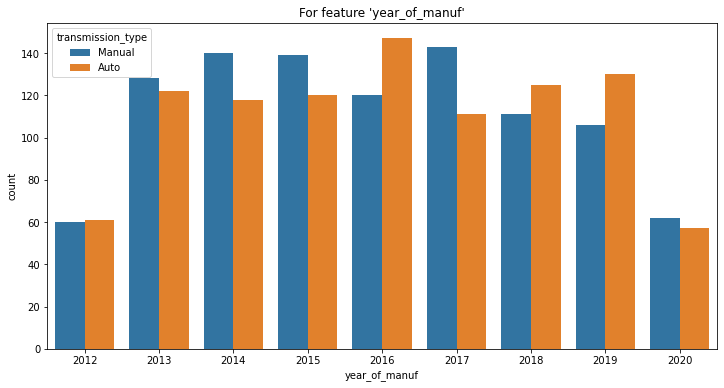

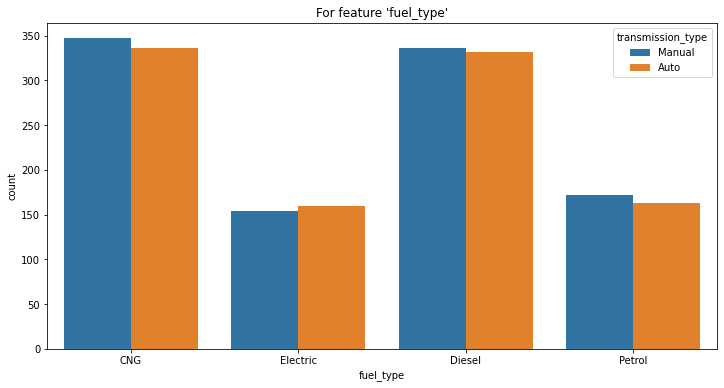

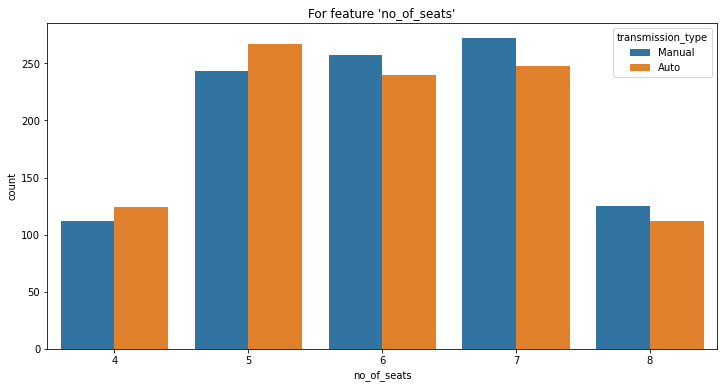

In [11]:
for i in data.columns[:-1]:
    plt.figure(figsize=(12,6))
    plt.title("For feature '%s'"%i)
    sns.countplot(data[i],hue=data['transmission_type'])

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le=LabelEncoder()

In [14]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [15]:
data.head()

,details_id,year_of_manuf,fuel_type,no_of_seats,transmission_type
0,0,3,0,1,1
1,1,2,2,2,0
2,2,1,2,4,1
3,3,6,1,2,1
4,4,3,2,4,0


<AxesSubplot:>

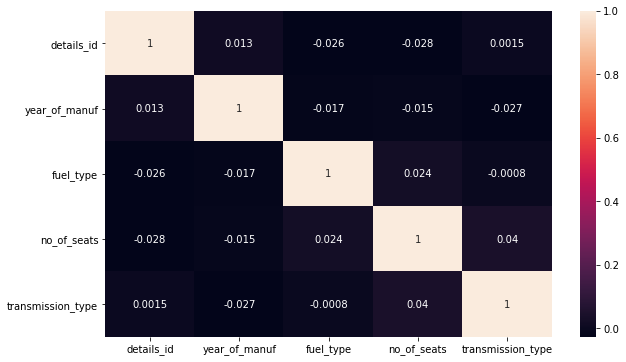

In [16]:
fig=plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True)

In [17]:
X=data[data.columns[:-1]]
y=data['transmission_type']

In [18]:
X.head(2)

,details_id,year_of_manuf,fuel_type,no_of_seats
0,0,3,0,1
1,1,2,2,2


In [19]:

from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


Logisitc Regression 

In [28]:

logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial')

In [29]:
logreg.fit(X_train,y_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

In [30]:

pred=logreg.predict(X_test)

In [31]:
logreg.score(X_test,y_test)

0.5183333333333333

In [32]:
lc=learning_curve(logreg,X_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,test_score)

NameError: name 'learning_curve' is not defined

In [33]:

from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
param_range=[0.0001,0.001,0.1,1]
curve=validation_curve(logreg,X_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1,)

In [34]:

curve

(array([[0.52232143, 0.51517857, 0.53660714, 0.52321429, 0.5125    ],
        [0.53125   , 0.54285714, 0.54107143, 0.52321429, 0.525     ],
        [0.52410714, 0.53839286, 0.52946429, 0.51428571, 0.51875   ],
        [0.52410714, 0.53928571, 0.53125   , 0.51428571, 0.52142857]]),
 array([[0.51785714, 0.50714286, 0.48571429, 0.52142857, 0.50714286],
        [0.51071429, 0.48928571, 0.49285714, 0.525     , 0.53214286],
        [0.49285714, 0.49642857, 0.49285714, 0.53214286, 0.52142857],
        [0.49285714, 0.49642857, 0.50357143, 0.53571429, 0.52142857]]))

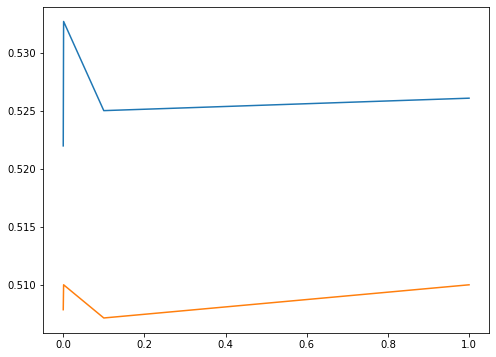

In [35]:

n=len(param_range)
train_score=[curve[0][i].mean() for i in range (0,n)]
test_score=[curve[1][i].mean() for i in range (0,n)]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:

param_grid={'C':[0.01,0.1,1,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [38]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']})

In [39]:

print(grid.best_params_)
print(grid.best_score_)

{'C': 0.1, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
0.5135714285714286


KNN

In [40]:

knn=KNeighborsClassifier(n_jobs=-1)

In [41]:

knn.fit(X_train,y_train)
pred=knn.predict(X_test)
knn.score(X_test,y_test)

0.485

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.49      0.45      0.47       304
           1       0.48      0.52      0.50       296

    accuracy                           0.48       600
   macro avg       0.49      0.49      0.48       600
weighted avg       0.49      0.48      0.48       600



In [43]:
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=5,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

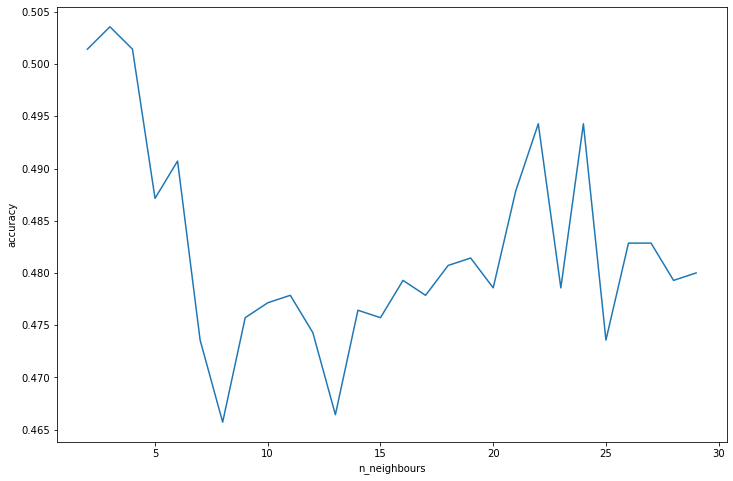

In [44]:
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")

Random Forest


In [45]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [48]:
rfc.fit(X_train,y_train)
print(rfc.score(X_test,y_test))


0.505


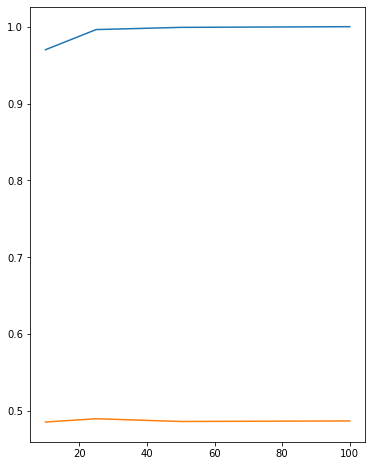

In [49]:
param_range=[10,25,50,100]
curve=validation_curve(rfc,X_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

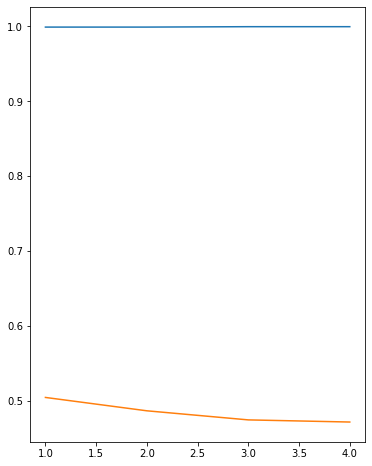

In [50]:

param_range=range(1,len(X.columns)+1)
curve=validation_curve(RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),X_train,y_train,cv=5,
    param_name='max_features',param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(6,8))
plt.plot(param_range,train_score)
plt.plot(param_range,test_score)
plt.xticks=param_range

In [51]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [52]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [53]:

grid.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=50, n_jobs=-1,
                                              random_state=51),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'max_features': [2, 4, 6, 'auto'],
                         'max_leaf_nodes': [2, 3, None]})

In [54]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'entropy', 'max_depth': 2, 'max_features': 4, 'max_leaf_nodes': None}
0.5071428571428571


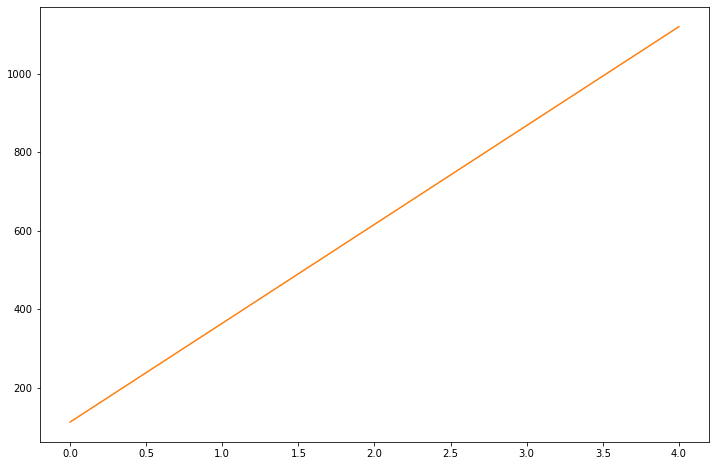

In [68]:

lc=learning_curve(RandomForestClassifier(n_estimators=50,criterion='entropy',max_features=6,max_depth=10,random_state=51,
                                             max_leaf_nodes=None,n_jobs=-1,),X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score)
plt.plot(size,)


In [69]:
print(X.columns)
print(rfc.feature_importances_)

Index(['details_id', 'year_of_manuf', 'fuel_type', 'no_of_seats'], dtype='object')
[0.65311095 0.15637594 0.08730229 0.10321082]


In [71]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X[['details_id', 'year_of_manuf', 'fuel_type', 'no_of_seats']],
    y, test_size=0.3, random_state=42)

In [1]:
print

NameError: name 'X' is not defined